**PROBLEM STATEMENT:**

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

## 1. Reading and understanding the data

In [1]:
# Importing the necessary librabries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# For performing Hopkins test
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan


In [2]:
#Reading the data and storing it in dataframe named 'countries'

countries = pd.read_csv(r"C:\Users\Deepa\Downloads\Country-data.csv")
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
#Understanding how many number of rows and coulumns does the dataframe have

countries.shape

(167, 10)

In [4]:
# Understanding the data types of all the columns

countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## 2. Cleaning the Data

In [5]:
# Finding the number of rows having missing values - As seen below, there are no rows with missing values

round(100*(countries.isnull().sum()/len(countries.index)),2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [6]:
# Displaying the top 5 rows in the dataframe 

countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
# As exports is given as the percentage of gdpp,conversion to actual numbers is done from percentage

countries['exports'] = countries['exports']*countries['gdpp']/100

In [8]:
# As health is given as the percentage of gdpp,conversion to actual numbers is done from percentage

countries['health'] = countries['health']*countries['gdpp']/100

In [9]:
# As imports is given as the percentage of gdpp,conversion to actual numbers is done from percentage

countries['imports'] = countries['imports']*countries['gdpp']/100

In [10]:
# Now all the values are given by the actual numbers

countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## 3. Visualize and Prepare the Data for Modelling

In [11]:
def boxplots(attributes):
    plt.figure(figsize=(18,18))
    for i in enumerate(attributes):
        ax = plt.subplot(3, 3, i[0]+1)
        sns.boxplot(x=i[1], data=countries)      


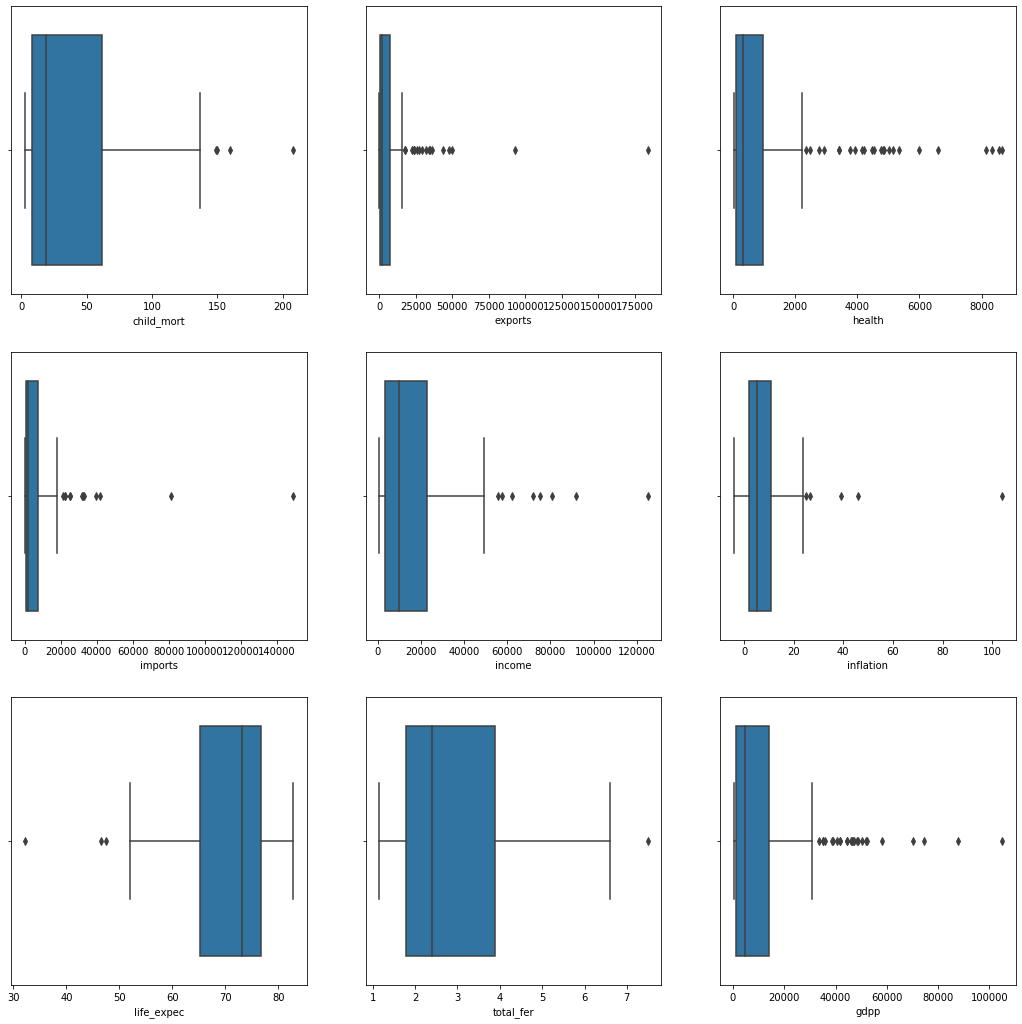

In [12]:
# Visualizing plot to look at the data distribution and possible outliers

attributes = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
boxplots(attributes)

From the plot above, following points can be noted:
1. Child mortality - Number of Death of children under 5 years of age per 1000 live births has a median around 15
2. Exports - Most countries Exports of goods and services per capita can be seen around 1000
3. Health - Total amount spend on health per capita is around 250.
4. Life expectancy is around lower outlier is around 31 
5. Total Fertility outlier is above 7
6. Gdpp - Most of the countries have the gdpp between 1000 and 17000, there are few outliers in this column which singnifies that those countries are economically well off
7. Income - Median income is around 9000
8. Inflation - Median is around 8

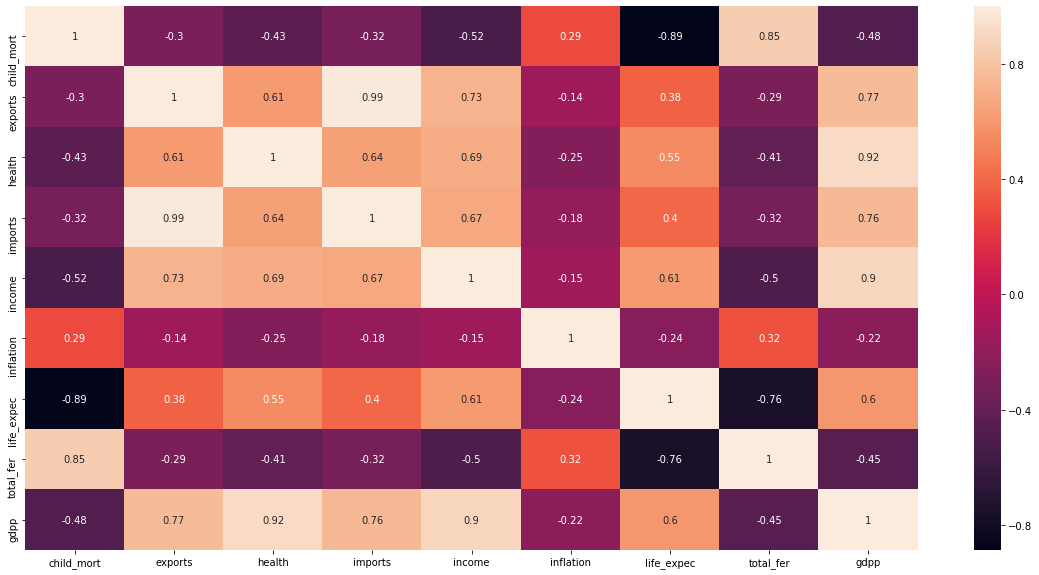

In [13]:
# Heat map is plotted and imports and exports are highly co related with 0.99 correlation, child mortality and total fertility in woman is also highly correlated

plt.figure(figsize = (20,10))
factors = countries[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
countries_heatmap = sns.heatmap(data = factors.corr(), annot = True)
bottom, top = countries_heatmap.get_ylim()
countries_heatmap.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

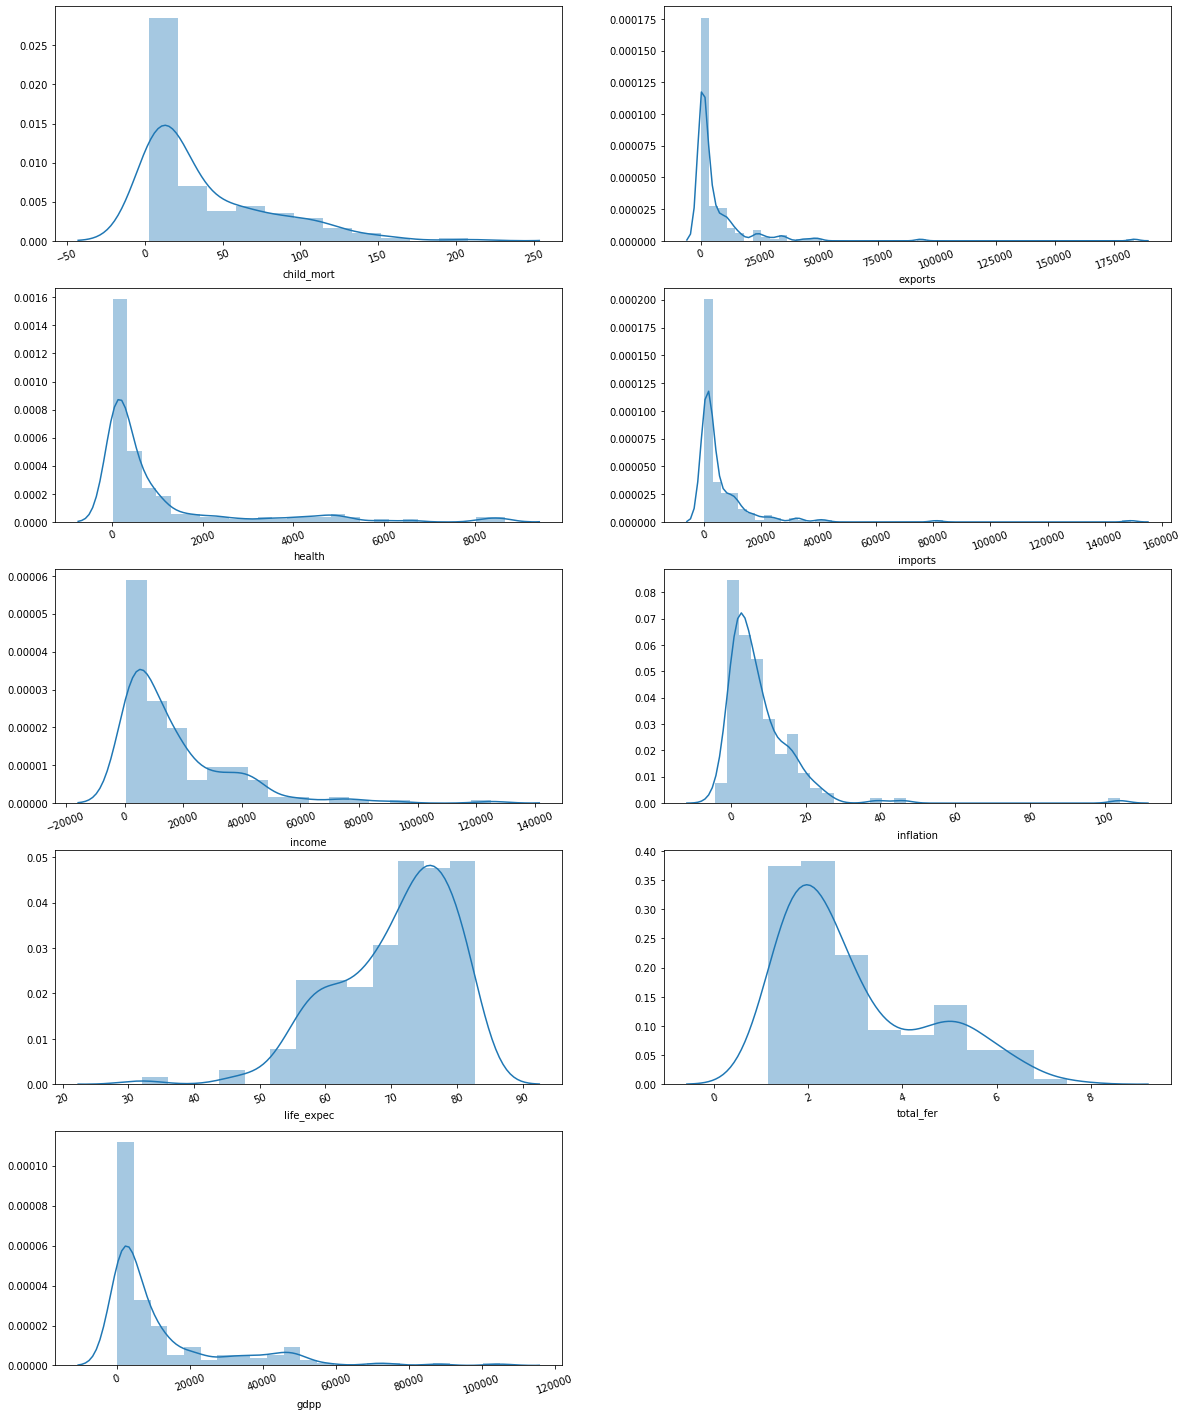

In [14]:
# Plot below shows the distribution of all the variables
# Only child mortality column is normally distributed

plt.figure(figsize = (20,25))

features = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
for i in enumerate(features):
    feat = plt.subplot(5,2,i[0]+1)
    sns.distplot(countries[i[1]])
    plt.xticks(rotation = 20)

(166, 10)


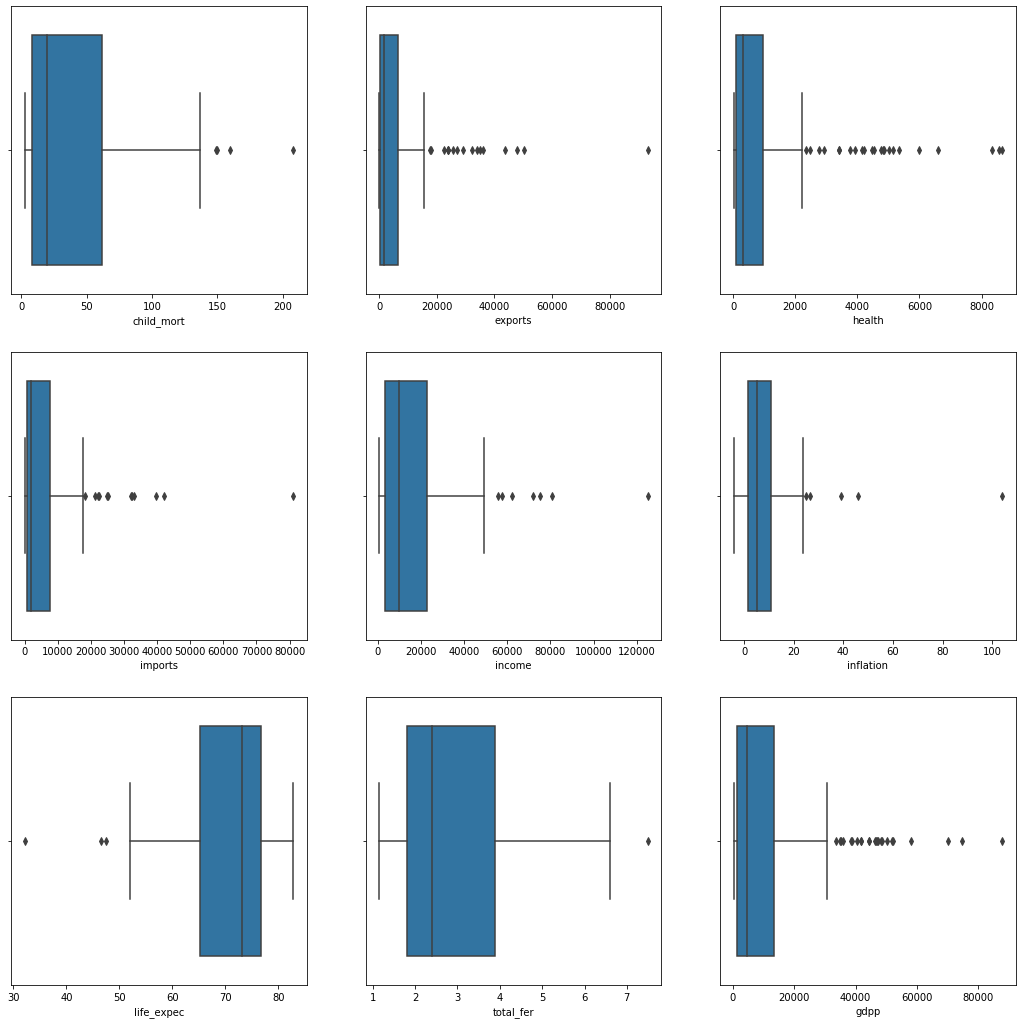

In [15]:
# IQR is performed to remove the countries which are below 1 and 99 percentiles respectively.
# Boundries for quantiles are not set in extreme way as it could remove many countries and that is not right for analysis


for i in enumerate(features):
        Q1 = countries[i[1]].quantile(0.01)
        Q3 = countries[i[1]].quantile(0.99)
        IQR = Q3 - Q1
        lower = Q1- IQR*1.5
        upper = Q3+ IQR*1.5
        countries = countries[(countries[i[1]] >= lower) & (countries[i[1]] <= upper)]
boxplots(features)
print(countries.shape)

In [16]:
# 1 country gets removed

countries.shape

(166, 10)

In [17]:
# Defining hopkins function

def hopkins(X):
    d = X.shape[1]
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    rand_X = sample(range(0, n, 1), m)
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd,wjd)
        H = 0
    return H 

In [18]:
# Hopkins score is above 90, which indicates that data set is a good candidate for clustering since data is not random

round(hopkins(countries.drop('country',axis = 1)),3)

0.867

In [19]:
# Scaling so that all the variables can have a normal scale

countries_df = countries[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
scaler = StandardScaler()
countries_scaled = scaler.fit_transform(countries_df)
countries_scaled.shape

(166, 9)

In [20]:
# Scaled Dataframe is displayed below

countries_scaled = pd.DataFrame(countries_scaled)
countries_scaled.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
countries_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.285378,-0.543227,-0.566958,-0.567422,-0.820598,0.154565,-1.614114,1.896292,-0.702817
1,-0.543908,-0.449295,-0.435152,-0.387364,-0.368021,-0.313930,0.656110,-0.864627,-0.493159
2,-0.277965,-0.400391,-0.482929,-0.448158,-0.206464,0.784905,0.678700,-0.043634,-0.471227
3,2.001185,-0.358458,-0.532727,-0.436365,-0.587238,1.381172,-1.173623,2.121403,-0.526353
4,-0.700490,-0.069585,-0.162319,0.150713,0.130793,-0.602599,0.712583,-0.546823,-0.012432


## 4. Modelling

In [21]:
# defining the function named ssd to calucate and plot elbow curve

def ssd():
    ssd = []
    range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
    for num_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
        kmeans.fit(countries_scaled)

        ssd.append(kmeans.inertia_)
    plt.plot(ssd)
    plt.show()

In [22]:
# defining the function named silhoutte to calucate silhoutte score

def silhoutte():
    range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
    ss = []
    for num_clusters in range_n_clusters:

        # intialise kmeans
        kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
        kmeans.fit(countries_scaled)

        cluster_labels = kmeans.labels_

        # silhouette score
        silhouette_avg = silhouette_score(countries_scaled, cluster_labels)
        print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
        

In [23]:
# defining the function named silhoutteplot to display silhoutte score plot

def silhoutteplot():
    ss = []
    for k in range(2,10):
        kmeans = KMeans(n_clusters = k).fit(countries_scaled)
        ss.append([k, silhouette_score(countries_scaled, kmeans.labels_)])
    
    plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

In [24]:
# Started with choosing 4 as the number of clusters randomly

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(countries_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
# As the number of clusters is chosen as 4, labels ranging from 0-3 are generated

kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 3, 1, 0, 0, 1, 0, 3, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 3, 3,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 3, 3, 0, 0, 1, 3, 0, 3, 1, 1, 0, 0, 1,
       0, 1, 3, 1, 1, 1, 0, 2, 3, 3, 1, 3, 1, 1, 0, 0, 3, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 3, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2,
       3, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 3, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       2, 3, 3, 0, 0, 3, 3, 1, 1, 0, 1, 3, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 3, 3, 3, 1, 1, 1, 1, 1, 0, 0])

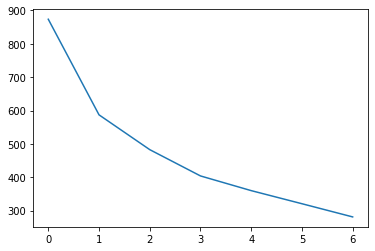

In [26]:
# Finding optimal number of clusters - 3 is the optimal number of cluster according to elbow curve plotted below
# as after k = 3(given by index 1 as per plot), value of SSD doesn’t decrease significantly. 

ssd()

For n_clusters=2, the silhouette score is 0.4772389734172778
For n_clusters=3, the silhouette score is 0.4200380405745469
For n_clusters=4, the silhouette score is 0.40717389777761004
For n_clusters=5, the silhouette score is 0.39892991131409905
For n_clusters=6, the silhouette score is 0.30055873795642774
For n_clusters=7, the silhouette score is 0.295613525989158
For n_clusters=8, the silhouette score is 0.2946681306876386


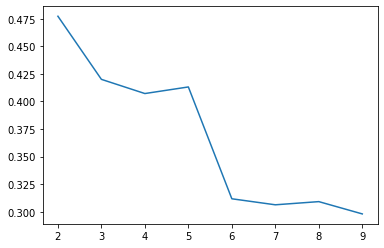

In [27]:
# Silhoutte scores also imply that 3 is the optimal number of cluster as from 2 to 3, there is a certain difference in score.

silhoutte()
silhoutteplot()

In [28]:
# Finalizing number of clusters as 3 based on Elbow curve and silhoutte score

kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(countries_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1,
       1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 0,
       2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [30]:
# Assigning the cluster id's found by K means to the countries dataframe

countries['cluster_id'] = kmeans.labels_
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [31]:
# Displaying the scaled dataframe

countries_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.285378,-0.543227,-0.566958,-0.567422,-0.820598,0.154565,-1.614114,1.896292,-0.702817
1,-0.543908,-0.449295,-0.435152,-0.387364,-0.368021,-0.313930,0.656110,-0.864627,-0.493159
2,-0.277965,-0.400391,-0.482929,-0.448158,-0.206464,0.784905,0.678700,-0.043634,-0.471227
3,2.001185,-0.358458,-0.532727,-0.436365,-0.587238,1.381172,-1.173623,2.121403,-0.526353
4,-0.700490,-0.069585,-0.162319,0.150713,0.130793,-0.602599,0.712583,-0.546823,-0.012432


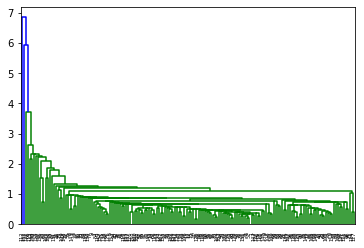

In [32]:
# Using hierarchical clustering, dendrogram is generated. 
# Chosen method is Single, hence dendrogram is not structured correctly

mergings = linkage(countries_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

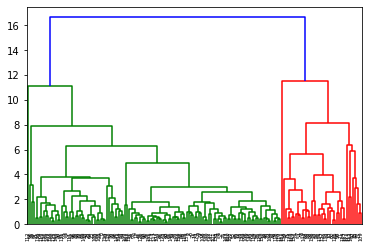

In [33]:
# Using hierarchical clustering, dendrogram is generated. 
# Chosen method is Complete. 
# The choices for number of clusters according to this will be 2 or 4. Since 2 would divide the data into half, this will not help the analysis greatly
# This is the choice I made after consulting the business analyst,taking 10 as the cut off,going ahead with k =4

mergings = linkage(countries_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [34]:
# Based on the results obtained by complete hierarchical clustering, number of clusters is chosen as 4

cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       3, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [35]:
# Adding cluster labels obtained by Hierarchical clustering to the original Dataframe under the name 'Cluster_labels'

countries['cluster_labels'] = cluster_labels
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0


In [36]:
# Finding the distribution of unique values of cluster id's

countries['cluster_id'].value_counts()

0    90
2    48
1    28
Name: cluster_id, dtype: int64

In [37]:
# Finding the distribution of unique values of cluster labels

countries['cluster_labels'].value_counts()

0    125
1     39
3      1
2      1
Name: cluster_labels, dtype: int64

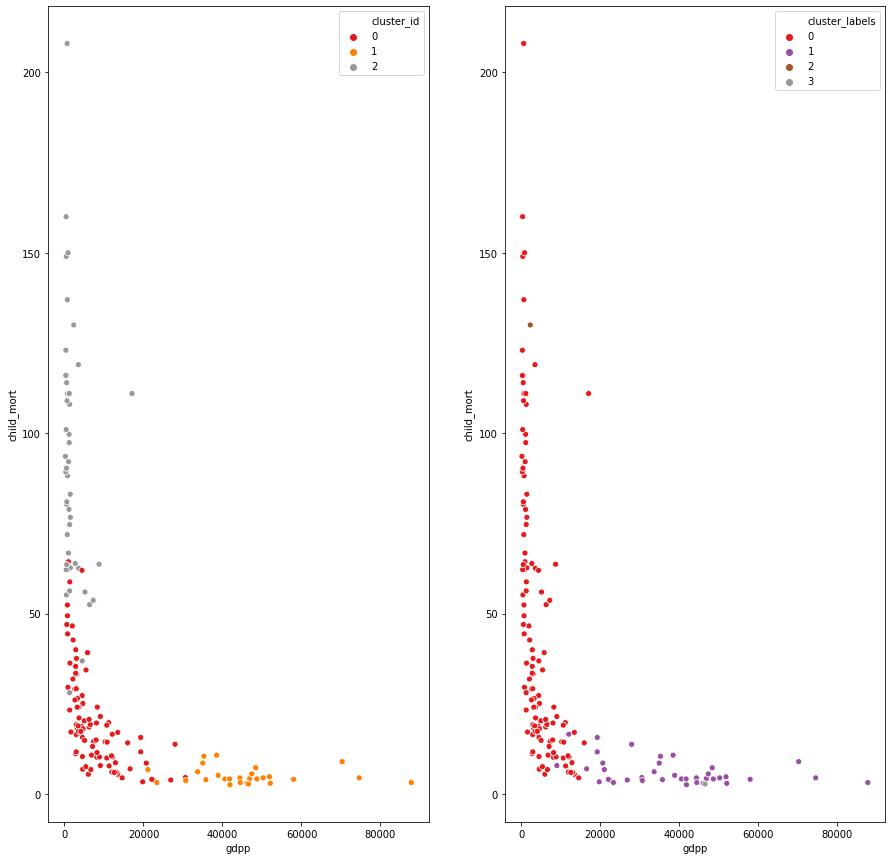

In [38]:
# Plotting Child mortality and gdpp column for both k = 3 (optimal number of clusters as per Kmeans) &
# k = 4 (optimal number of clusters as per Hierarchical Clustering)
# It can be noted that with 4 as the number of clusters, clusters are not clearing defined and cluster with labels 0,1 have the dominatingg  effect on cluster creation
# Where as with 3 as the number of clusters, clusters formed are well balanced. Thus 3 would be the correct number of clusters

plt.figure(figsize=(15,15))

plt.subplot(121)
sns.scatterplot(y = 'child_mort',x = 'gdpp', hue = 'cluster_id', data = countries, palette = 'Set1')

plt.subplot(122)
sns.scatterplot(y = 'child_mort',x = 'gdpp', hue = 'cluster_labels', data = countries, palette = 'Set1')
plt.show()


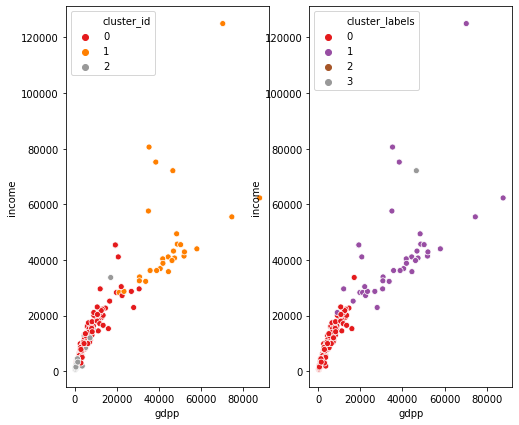

In [39]:
# Plotting Income and gdpp column for both k = 3 (optimal number of clusters as per Kmeans) &
# k = 4 (optimal number of clusters as per Hierarchical Clustering)
# It can be noted that with 4 as the number of clusters, clusters are not clearing defined and cluster with labels 0,1 have the dominatingg  effect on cluster creation
# Where as with 3 as the number of clusters, clusters formed are well balanced. Thus 3 would be the correct number of clusters


plt.figure(figsize=(8,7))

plt.subplot(121)
sns.scatterplot(y = 'income',x = 'gdpp', hue = 'cluster_id', data = countries, palette = 'Set1', legend = 'full')

plt.subplot(122)
sns.scatterplot(y = 'income',x = 'gdpp', hue = 'cluster_labels', data = countries, palette = 'Set1', legend = 'full')
plt.show()


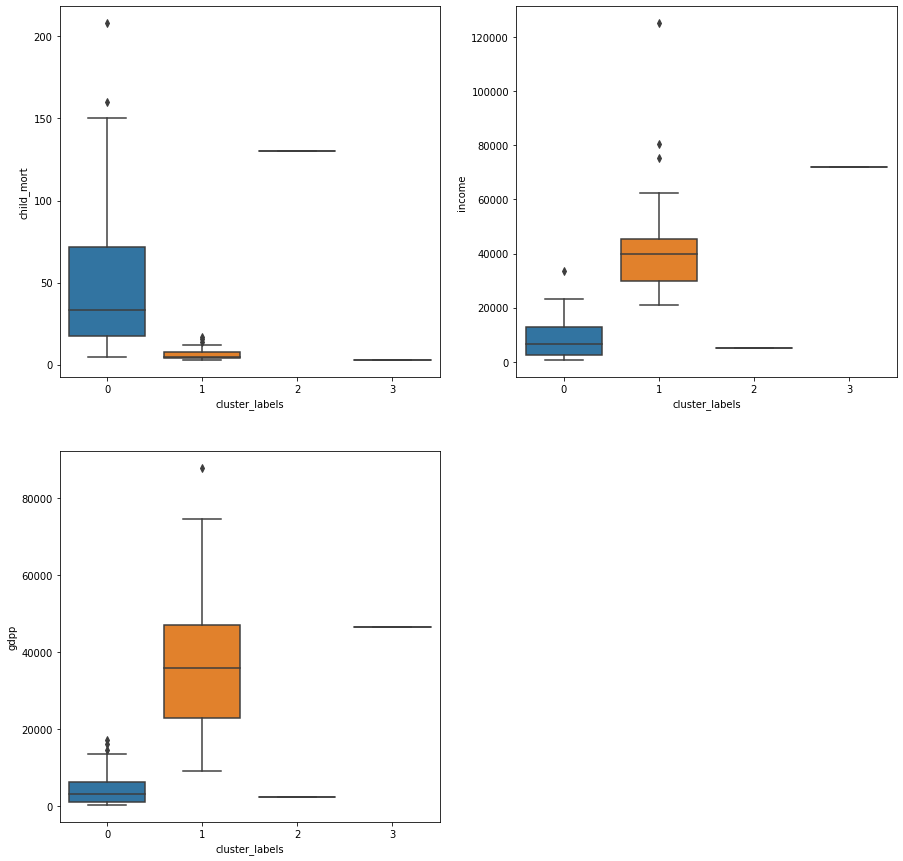

In [40]:
# Choosing number of clusters from Hierarchical Clustering - have resulted in badly distributed clusters

plt.figure(figsize = (15,15))

plt.subplot(221)
sns.boxplot(x='cluster_labels', y='child_mort', data=countries)

plt.subplot(222)
sns.boxplot(x='cluster_labels', y='income', data=countries)

plt.subplot(223)
sns.boxplot(x='cluster_labels', y='gdpp', data=countries)

plt.show()

In [41]:
# Clusters formed by Hierarchical clustering are not well balanced and cluster with labels 0,1 have the dominating effect on cluster creation

countries['cluster_labels'].value_counts()

0    125
1     39
3      1
2      1
Name: cluster_labels, dtype: int64

### Using 3 clusters is sufficient. Based on the unique values of cluster_id and cluster_labels it can be noted that cluster ids obtained by K-Means are having good distribution compared to cluster labels obtained by Hierarchical clustering which are not distributed well. Above plots also justifies the decision of choosing K-Means algorithm method.

## Cluster Profiling

In [42]:
# Displaying 5 rows to see the columns

countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0


In [43]:
# Dropping cluster labels given by Hierarchical clustering as I chosen k obtained by K-Means

countries.drop('cluster_labels',axis = 1, inplace = True)

In [44]:
# Grouping the data based on cluster Id obtained by K-means

countries.groupby('cluster_id').mean().reset_index()

,cluster_id,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,20.547778,3477.015539,528.894338,3588.133568,13804.333333,7.160078,73.393333,2.242444,7808.577778
1,1,5.060714,25013.103571,4114.428929,21018.764286,47928.571429,2.850143,80.450000,1.758571,45200.000000
2,2,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333


<Figure size 720x720 with 0 Axes>

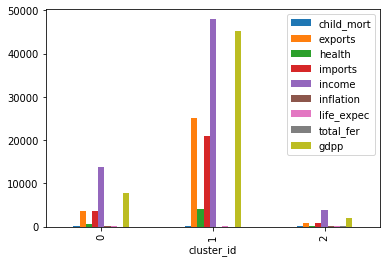

In [45]:
# Plotting to see how clusters are formed by visualizing all the columns. Cluster 2 looks like the cluster we need.

plt.figure(figsize = (10,10))
countries.groupby('cluster_id').mean().plot.bar()
plt.show()

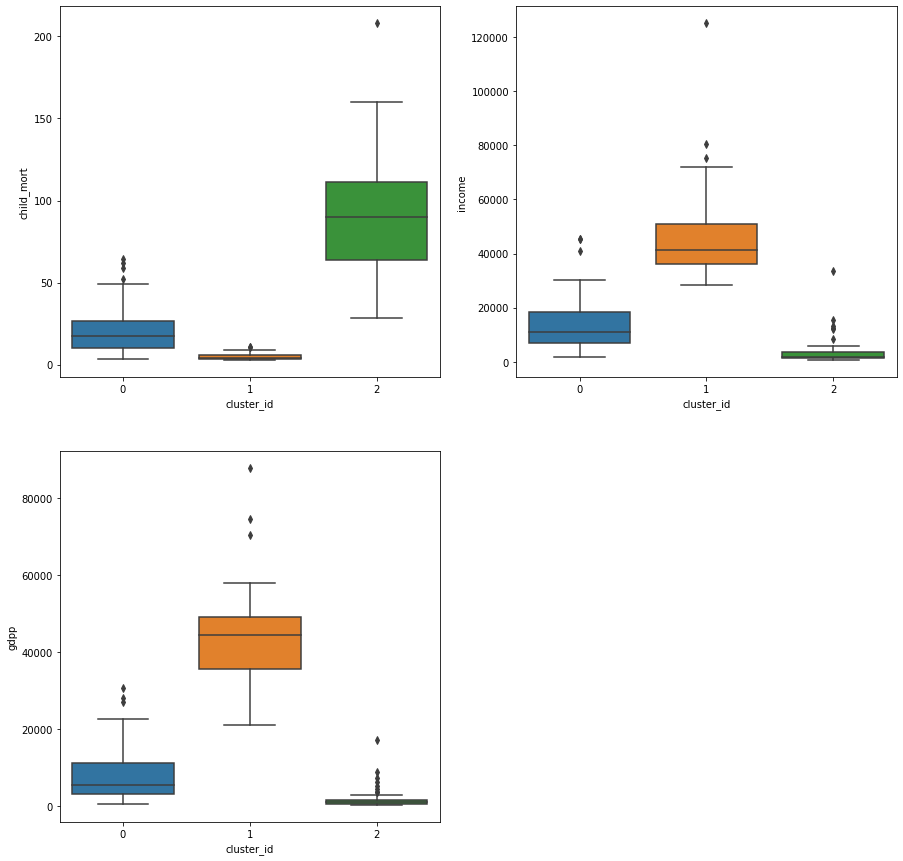

In [46]:
# Choosing cluster_id = 2 consists of the countries that are in dire need of monetary help.
# As income, gdpp is lower in this cluster compared to other clusters.
# Amount allocated to health is low,child mortality rate is high for this cluster


plt.figure(figsize = (15,15))

plt.subplot(221)
sns.boxplot(x='cluster_id', y='child_mort', data=countries)

plt.subplot(222)
sns.boxplot(x='cluster_id', y='income', data=countries)

plt.subplot(223)
sns.boxplot(x='cluster_id', y='gdpp', data=countries)

plt.show()

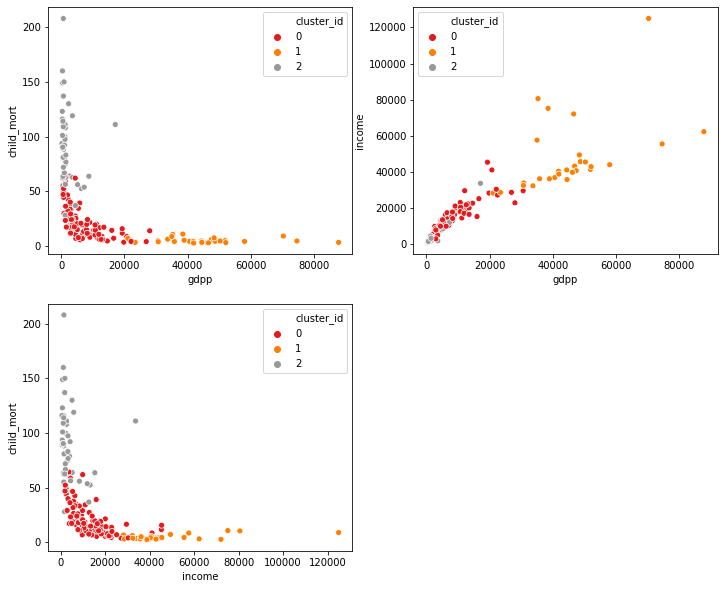

In [47]:
# Performing visualizations on the clusters performed

plt.figure(figsize=(12,10))

plt.subplot(221)
sns.scatterplot(y = 'child_mort',x = 'gdpp', hue = 'cluster_id', data = countries, palette = 'Set1')

plt.subplot(222)
sns.scatterplot(y = 'income',x = 'gdpp', hue = 'cluster_id', data = countries, palette = 'Set1')

plt.subplot(223)
sns.scatterplot(y = 'child_mort',x = 'income', hue = 'cluster_id', data = countries, palette = 'Set1')

plt.show()

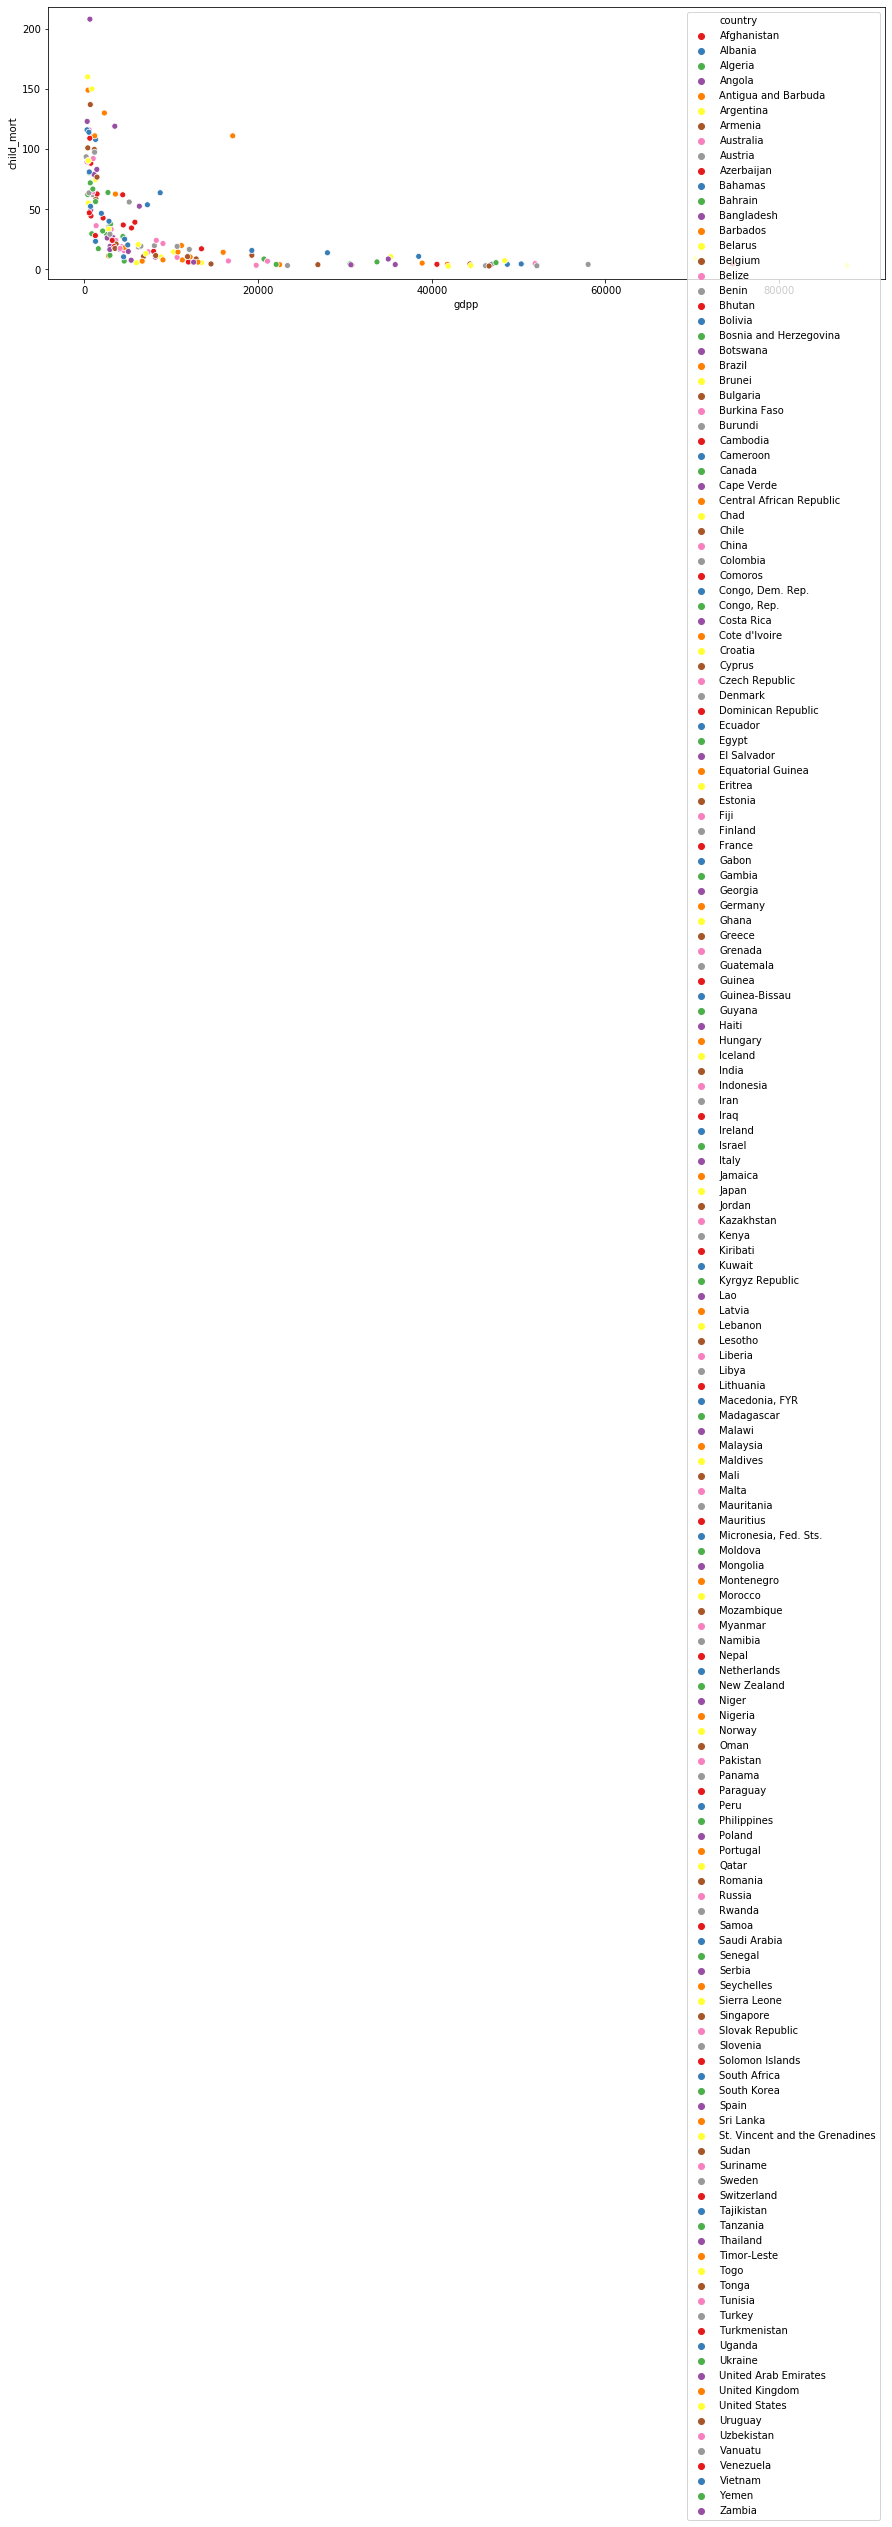

In [48]:
# Plotting scatter plots to see gdpp vs child mortality with hue as country

plt.figure(figsize=(15,5))

sns.scatterplot(y = 'child_mort',hue = 'country', x = 'gdpp', data = countries, palette = 'Set1')
plt.show()


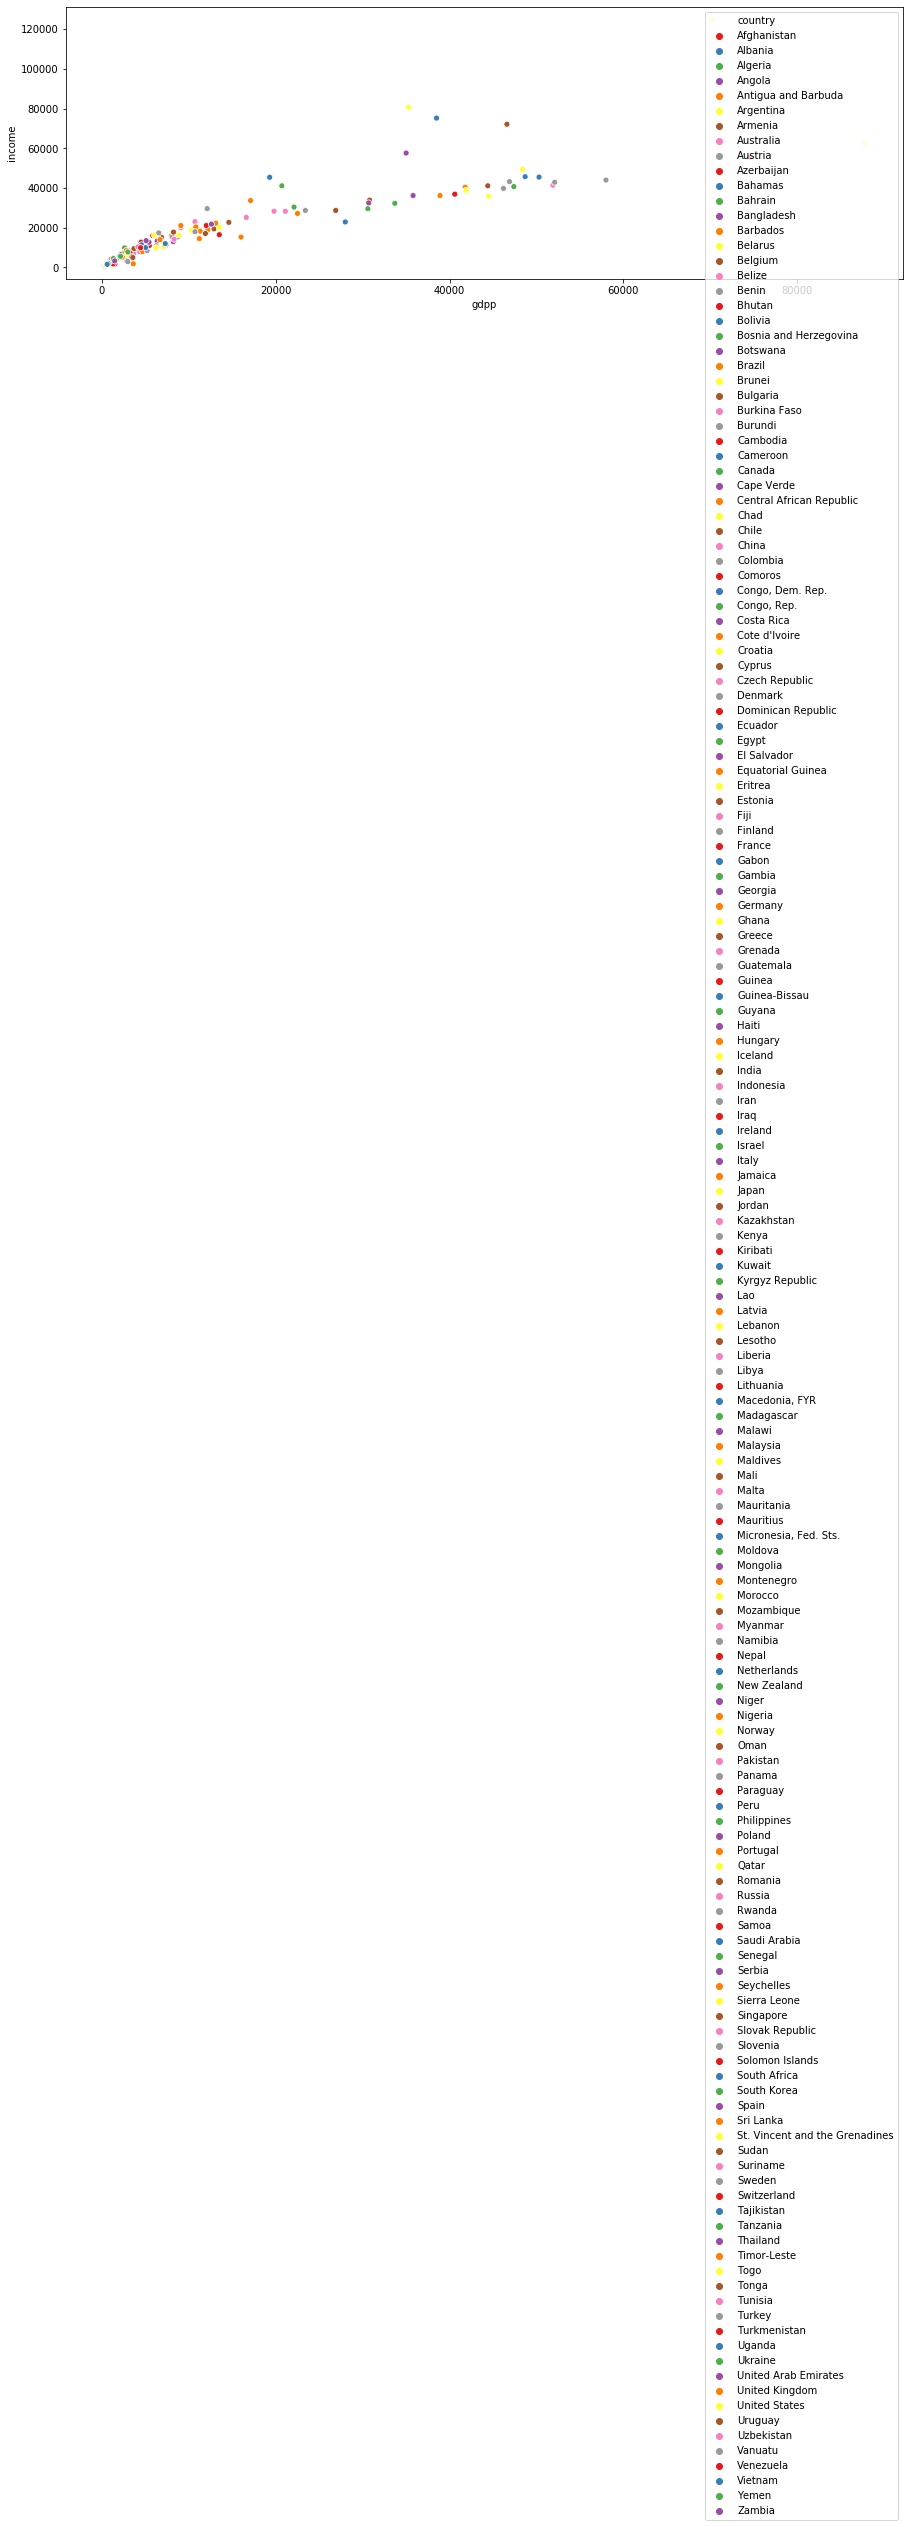

In [49]:
# Plotting scatter plots to see income vs gdpp with hue as country

plt.figure(figsize=(15,5))
sns.scatterplot(y = 'income',x = 'gdpp', hue = 'country', data = countries, palette = 'Set1')
plt.show()


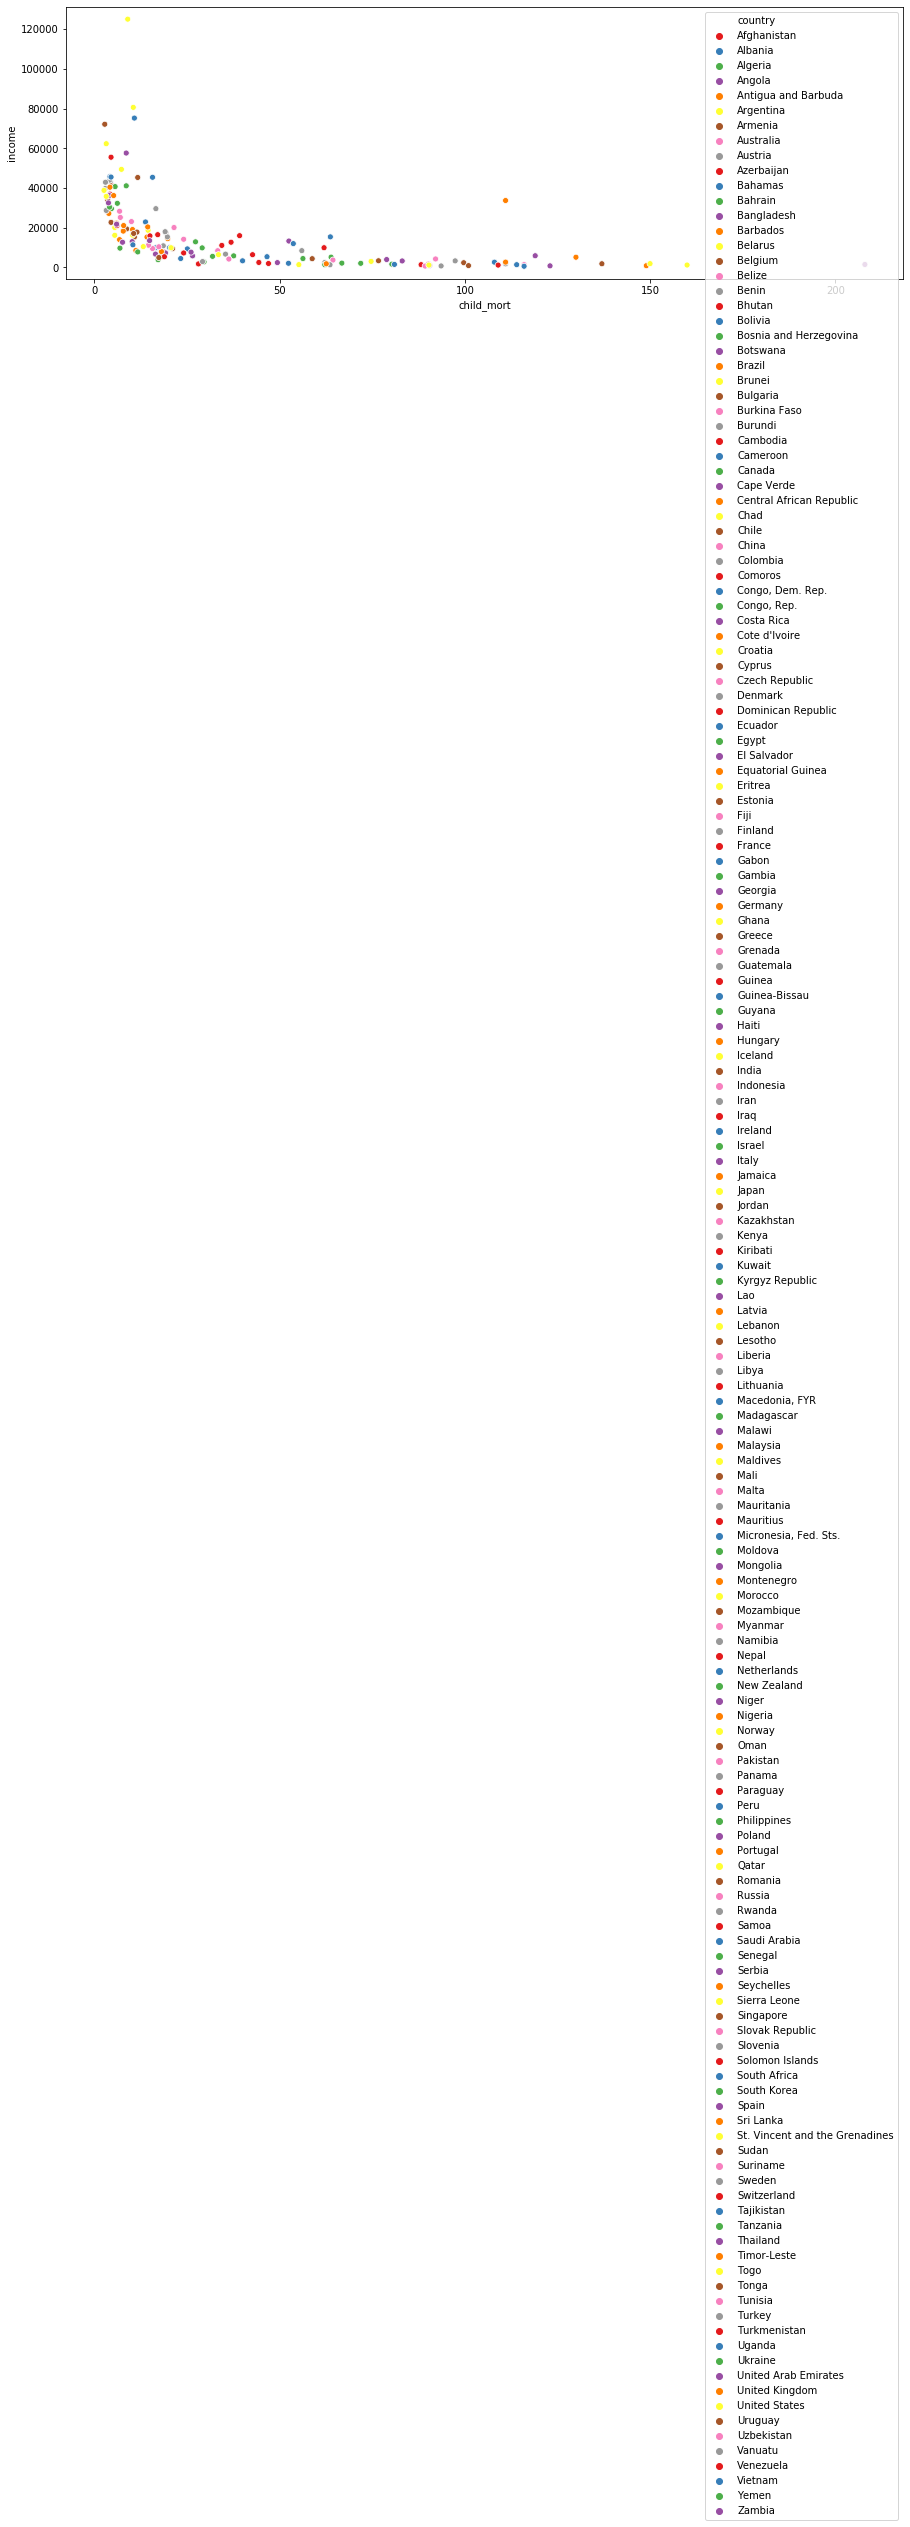

In [50]:
# Plotting scatter plots to see income vs child mortality with hue as country

plt.figure(figsize=(15,5))
sns.scatterplot(y = 'income',x = 'child_mort', hue = 'country', data = countries, palette = 'Set1')
plt.show()


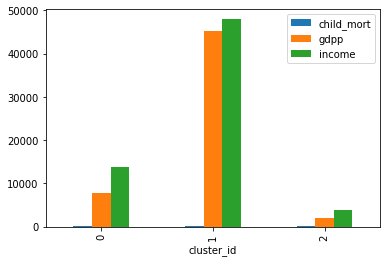

In [51]:
# The cluster with id = 2 is having high child mortality, low gdpp and low income compared to other clusters
# Thus the countries in this cluster are in dire need of monetary help
# Child mortality column was normally distributed, so not much of difference in this column is seen in the clusters

countries.groupby('cluster_id')['child_mort','gdpp','income'].mean().plot.bar()

3 clusters are formed. Their description goes as follows:
1. The cluster with id = 2 is having high child mortality, low gdpp and low income compared to other clusters. 
2. The cluster with id = 1 is having low child mortality, high gdpp and high income compared to other clusters. 
3. The cluster with id = 0 is having low child mortality, average gdpp and average income compared to other clusters. 

### Finding observations that belong to the cluster having countires in dire need of monetary help

In [52]:
# Countries belonging to cluster 2

countries[countries['cluster_id'] == 2]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [53]:
# Final 5 countires are obtained based on sorting by low gdpp, high child mortality, low income

countries[countries['cluster_id'] == 2].sort_values(by = ['gdpp','child_mort','income'],ascending = ['True','False','True']).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,2


### As per my analysis, countries which are in dire need of finance are as follows:
### 1. Burundi
### 2. Liberia
### 3. Congo
### 4. Niger
### 5. Sierra Leone